# Базовый график
_Строим базовый график и производим обработку_

См. комментарии в разделе "параметры", остальное менять не требуется

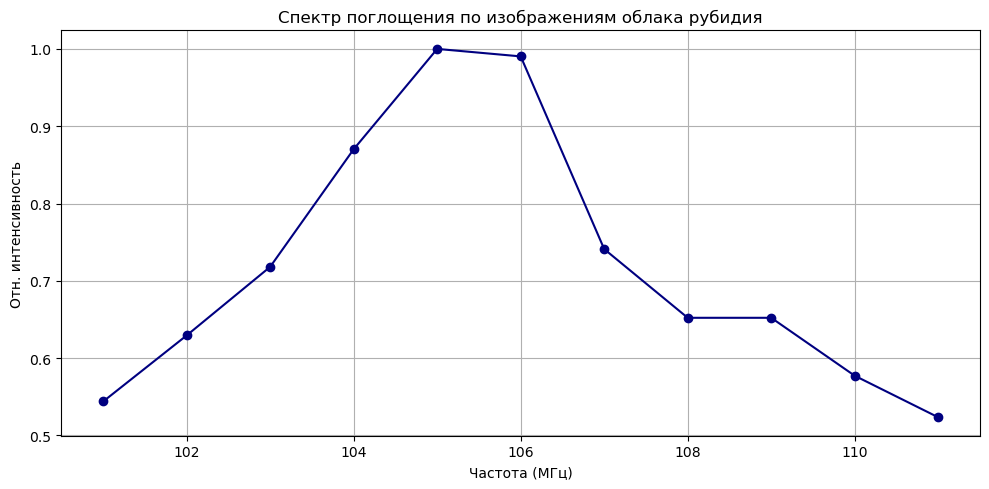

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Параметры
folder = "./Rubi87Spec/"  # путь к папке с .png-файлами, если лежат в текущей — оставить так
frequencies = list(range(101, 112))  # 101–111 МГц
crop_box = (737, 562, 781, 610)  # (left, upper, right, lower)

intensities = []

for f in frequencies:
    filename = os.path.join(folder, f"{f}.png")
    img = Image.open(filename).convert("L")  # ч/б
    cropped = img.crop(crop_box)
    arr = np.array(cropped, dtype=np.float32)
    avg_intensity = arr.mean()
    intensities.append(avg_intensity)

# Нормировка (опционально, в долях от максимума)
intensities = np.array(intensities)
norm_intensities = intensities / np.max(intensities)

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(frequencies, norm_intensities, 'o-', color='navy')
plt.xlabel("Частота (МГц)")
plt.ylabel("Отн. интенсивность (усл. единицы)")
plt.title("Спектр поглощения облака Rb-87")
plt.grid(True)
plt.tight_layout()
plt.show()

# Наводим марафет
__

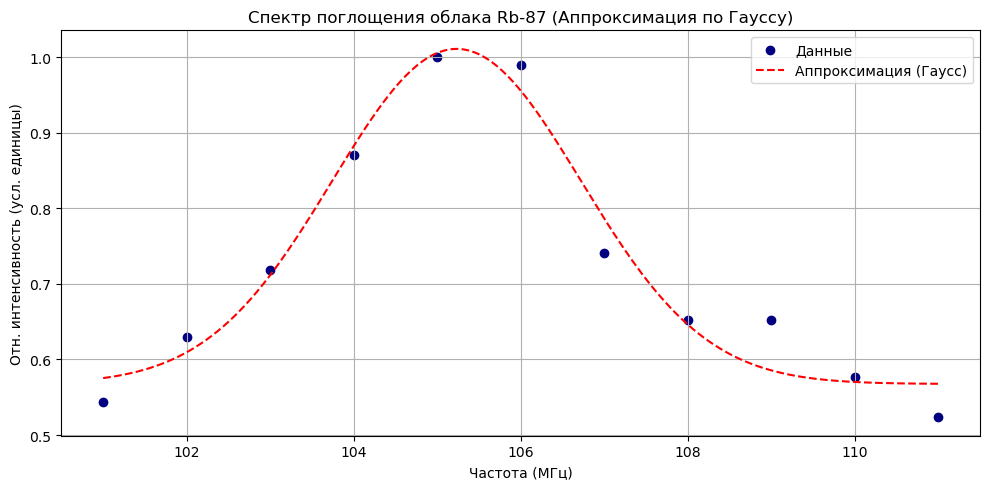

In [7]:
from scipy.optimize import curve_fit

# Гауссовская аппроксимация
def gauss(x, A, mu, sigma, C):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + C

popt, _ = curve_fit(gauss, frequencies, norm_intensities, p0=[1, 106, 2, 0])

# Построение графика
plt.figure(figsize=(10, 5))
plt.scatter(frequencies, norm_intensities, color='navy', label="Данные")  # без соединения точек
x_fit = np.linspace(min(frequencies), max(frequencies), 300)
plt.plot(x_fit, gauss(x_fit, *popt), 'r--', label="Аппроксимация (Гаусс)")

plt.xlabel("Частота (МГц)")
plt.ylabel("Отн. интенсивность (усл. единицы)")
plt.title("Спектр поглощения облака Rb-87 (Аппроксимация по Гауссу)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()